# Analysis of Bank Marketing Data Using Python
## by opitien Brume Pascal

## Introduction and Setup

#### Purpose and Overview:

This Jupyter Notebook is dedicated to analyzing the Bank Marketing dataset. The primary goal is to uncover key insights about factors influencing the success rate of marketing campaigns conducted by a banking institution. This analysis will focus on understanding how various attributes like customer demographics, economic indicators, and campaign strategies affect the likelihood of customers subscribing to a term deposit. The findings from this study are aimed to assist in optimizing future marketing strategies for the bank.

#### Import Libraries:
The analysis will utilize several Python libraries for data manipulation, analysis,visualization and machine learning tasks. The following libraries are essential for this project:

* pandas: For efficient data handling and manipulation.
* numpy: To perform numerical operations.
* matplotlib and seaborn: For data visualization and creating insightful graphs.
* sklearn: For the machine learning tasks ; data preprocessing and modeling.


In [36]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#ignore warning
import warnings
warnings.filterwarnings("ignore")
# Additional sklearn imports as need


## Data Loading

In this section, i am loading the Bank Marketing dataset into a DataFrame. This process involves reading the data from its source file and then displaying the first few rows to understand its structure and the types of data it contains.

In [3]:
# Loading the dataset
file_path = r"C:\Users\ACER SPIN3\Downloads\ASSIGNMENT DATA\PYTHON ASSIGNMENT\bank marketing\bank-additional-full.csv"  # Replace with the actual file path
bd = pd.read_csv(file_path, sep=';')  # Assuming ';' as the separator, adjust if different

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
bd.head()


First few rows of the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The 'sep' parameter is crucial here because the dataset uses semicolons (';') as delimiters instead of the default comma (','). Specifying 'sep=";"' ensures that pandas correctly parses the data into separate columns.This is essential for datasets where commas are part of the data or in regions where commas are used as decimal separators.

## Data Inspection and Cleaning



#### Inspect the Data:

In [4]:
# Checking for missing values

missing_values = bd.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
# Understanding data types of each column

data_types = bd.dtypes
print("\nData types of each column:")
print(data_types)


Data types of each column:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [6]:
#checking for duplcates

duplicates = bd.duplicated().sum()
duplicates

12

In [7]:
# Find duplicate rows in the dataset
duplicate_rows = bd[bd.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired 

I identified 12 duplicate rows in the dataset. These were retained due to the absence of unique identifiers making it challenging to determine if they are true duplicates or different customers with similar attributes. Given the potential risk of losing valuable data, I would opt for a conservative approach to ensure my analysis remains comprehensive and representative of the overall dataset.

## Cleaning and Reformating

In [8]:
# Renaming the 'y' column to 'term_deposit'

bd.rename(columns={'y': 'term_deposit'}, inplace=True)

# Displaying the first few rows to confirm the column has been renamed

print("First few rows of the dataset with the renamed column:")
bd.head()


First few rows of the dataset with the renamed column:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
##check for unique values within the categorical columns

for col in bd.columns:
    if bd[col].dtype == 'object':  # check if column's data type is 'object'
        print(f'{col} unique categories :' , bd[col].unique())
        

job unique categories : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital unique categories : ['married' 'single' 'divorced' 'unknown']
education unique categories : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default unique categories : ['no' 'unknown' 'yes']
housing unique categories : ['no' 'yes' 'unknown']
loan unique categories : ['no' 'yes' 'unknown']
contact unique categories : ['telephone' 'cellular']
month unique categories : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week unique categories : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome unique categories : ['nonexistent' 'failure' 'success']
term_deposit unique categories : ['no' 'yes']


In [10]:
## renaming the values within columns

education_spellings = {
    'basic.4y': 'Basic 4 Years',
    'basic.6y': 'Basic 6 Years',
    'basic.9y': 'Basic 9 Years',
    'high.school': 'High School',
    'professional.course': 'Professional Course',
    'university.degree': 'University Degree',
    'illiterate': 'Illiterate'
}

bd['education'] = bd['education'].replace(education_spellings)

bd['job'] = bd['job'].replace('admin.', 'Admin')

print("First few rows of the dataset after reformatting education levels:")
bd.head()


First few rows of the dataset after reformatting education levels:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit
0,56,housemaid,married,Basic 4 Years,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,High School,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,High School,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,Admin,married,Basic 6 Years,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,High School,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:

# Reformatting month names
month_replacements = {
    'jan': 'January',
    'feb': 'February',
    'mar': 'March',
    'apr': 'April',
    'may': 'May',
    'jun': 'June',
    'jul': 'July',
    'aug': 'August',
    'sep': 'September',
    'oct': 'October',
    'nov': 'November',
    'dec': 'December'
}

bd['month'] = bd['month'].replace(month_replacements)


# Reformatting day of week names
day_of_week_replacements = {
    'mon': 'Monday',
    'tue': 'Tuesday',
    'wed': 'Wednesday',
    'thu': 'Thursday',
    'fri': 'Friday'
}

bd['day_of_week'] = bd['day_of_week'].replace(day_of_week_replacements)


print("First few rows of the dataset after reformatting months and days:")
bd.head()


First few rows of the dataset after reformatting months and days:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit
0,56,housemaid,married,Basic 4 Years,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,High School,unknown,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,High School,no,yes,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,Admin,married,Basic 6 Years,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,High School,no,no,yes,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
##calculating the % of unknown / null 

for col in bd.columns:
    if bd[col].dtype == 'object':  # checks if column's data type is 'object'
        unknown_count = (bd[col] == 'unknown').sum()  # counts the 'unknown' in the column
        unknown_percentage = (unknown_count / bd.shape[0]) * 100  
        print(f'{col}: {unknown_count}, {unknown_percentage:.2f}% unknown')

job: 330, 0.80% unknown
marital: 80, 0.19% unknown
education: 1731, 4.20% unknown
default: 8597, 20.87% unknown
housing: 990, 2.40% unknown
loan: 990, 2.40% unknown
contact: 0, 0.00% unknown
month: 0, 0.00% unknown
day_of_week: 0, 0.00% unknown
poutcome: 0, 0.00% unknown
term_deposit: 0, 0.00% unknown


### Take Note 

The dataset contains unknown values in several key columns:

* job: 330 occurrences
* marital: 80 occurrences
* education: 1731 occurrences
* default: 8597 occurrences
* housing: 990 occurrences
* loan: 990 occurrence

### Handling the 'Unknown' Values:

Given the relatively high frequency of the 'unknown' values in certain columns (especially in default), if i completely remove these records, it might lead to a significant loss of data. Instead i will treat 'unknown' as a separate categories for these columns. This approach is might be useful to provide insights into patterns associated with these  values.

In [15]:

bd['job'] = bd['job'].replace('unknown', 'Other Jobs')

bd['marital'] = bd['marital'].replace('unknown', 'Not specified')

bd['education'] = bd['education'].replace('unknown', 'Not specified')

# For 'default', 'unknown' will be kept (no changes)


bd['housing'] = bd['housing'].replace('unknown', 'Not specified')

bd['loan'] = bd['loan'].replace('unknown', 'Not specified')


print("First few rows of the dataset after handling unknown values:")
bd.head()


First few rows of the dataset after handling unknown values:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit
0,56,housemaid,married,Basic 4 Years,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,High School,unknown,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,High School,no,yes,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,Admin,married,Basic 6 Years,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,High School,no,no,yes,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Sampling:
Next, I will randomly sample 20% of the data, setting a random seed for reproducibility. This sampled data will be used for subsequent analysis in Task 2. ​

In [16]:
# Set a random seed for reproducibility
random_seed = 42

# 20% of the data
_, sample_df = train_test_split(bd, test_size=0.20, random_state=random_seed)

# size
print("Size of the sampled data:", sample_df.shape)




Size of the sampled data: (8238, 21)


In [55]:
sample_df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,age_group
32884,57,technician,married,High School,no,no,yes,cellular,May,Monday,...,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no,>51 Elders


# Exploratory Data Analysis

To understand the patterns based on the tasks of this work

### 1. Response rate by Job and Education

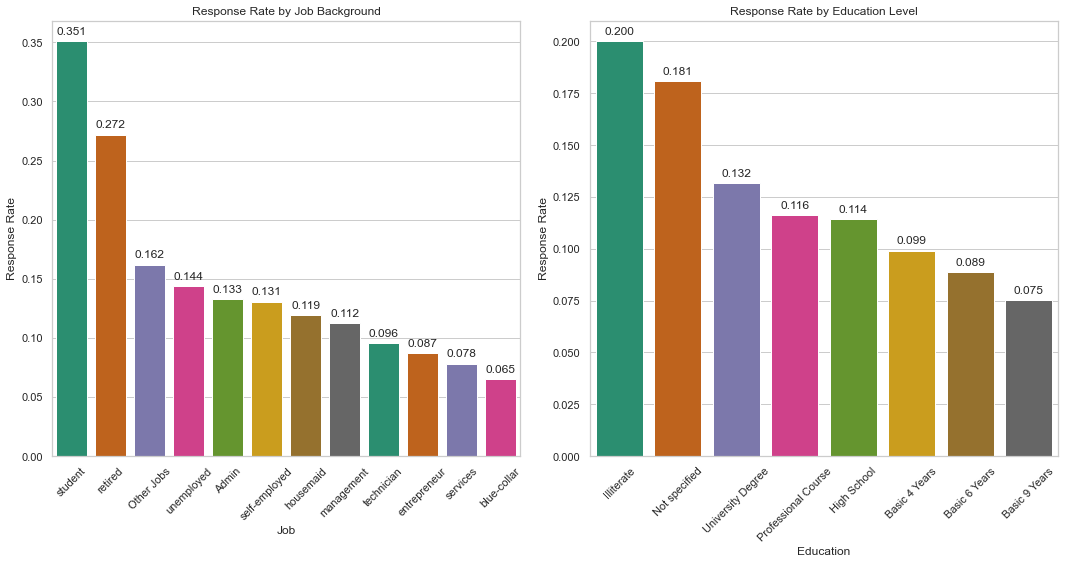

In [17]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")


# Calculating theresponse rates for thejob categories and education levels
response_rate_by_job = sample_df.groupby('job')['term_deposit'].value_counts(normalize=True).loc[:, 'yes'].sort_values(ascending=False)
response_rate_by_education = sample_df.groupby('education')['term_deposit'].value_counts(normalize=True).loc[:, 'yes'].sort_values(ascending=False)

# result plt
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot for Job Background
sns.barplot(x=response_rate_by_job.index, y=response_rate_by_job.values, ax=axes[0], palette="Dark2")
axes[0].set_title('Response Rate by Job Background')
axes[0].set_ylabel('Response Rate')
axes[0].set_xlabel('Job')
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

# Plot for Education Level
sns.barplot(x=response_rate_by_education.index, y=response_rate_by_education.values, ax=axes[1], palette="Dark2")
axes[1].set_title('Response Rate by Education Level')
axes[1].set_ylabel('Response Rate')
axes[1].set_xlabel('Education')
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

plt.tight_layout()
plt.show()


#### Response Rate by Job Background:

* Students and Retired individuals have the highest response rates, they may be more receptive to the bank's marketing efforts.

* The "Other" category also shows a relatively high response rate, which could consists of various job roles not specified in the categories.

* Entrepreneurs, Services and Blue-collar workers have the lower response rates, it possibly indicates that these job backgrounds are less responsive to the type of marketing campaigns conducted by the bank.


#### Response Rate by Education Level:

* Illiterate individuals which is likely a small proportion in the dataset show the highest response rate. This could be due to targeted campaigns for these set of people.

* Individuals with University Degrees and those i categorized as "Not Specified" have the next highest response rates, suggesting a well-educated demographic is also responsive.

* Professional courses, High School education, and Basic Education levels show moderate response rates.

* The response rates decrease as the education level specified is lower

### 2. Response rates by contact communication type

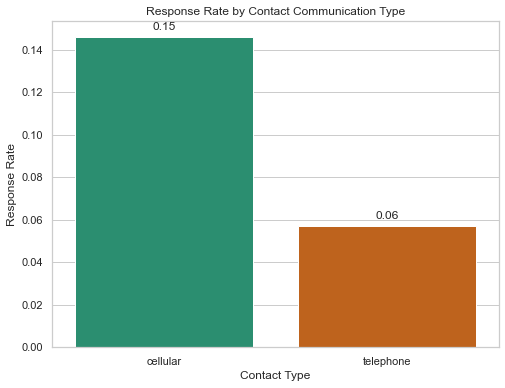

In [18]:
# calculating response rates and grouping  by contact communication type
response_rate_by_contact = sample_df.groupby('contact')['term_deposit'].value_counts(normalize=True).loc[:, 'yes']

# Plotting the results
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=response_rate_by_contact.index, y=response_rate_by_contact.values, palette="Dark2")
plt.title('Response Rate by Contact Communication Type')
plt.ylabel('Response Rate')
plt.xlabel('Contact Type')

# Adding values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

#### Cellular:

* The response rate for cellular contact type is higher than telephone.
* The bar for cellular shows a response rate of 15%.

#### Telephone:

* The response rate for telephone contact type is lower with the bar reaching just 6%.

#### Interpretation:

* There is a clear preference for cellular contact over telephone among the customers surveyed. This could be due to a variety of factors ; the convenience of cellular phones, the personal nature of cellular communication, or the possibility that cellular contacts might be more timely and direct.

### 3. Contact communication type-responses relationship  across different age groups


Here the age has to be grouped with a function with if statments for the range of age

In [278]:
#grouping the age 

def age_grouping(age):
    if age <=25:
        return "<25 Young Adults"
    elif age <=40:
        return "25-40 Adults"
    elif age<=50:
        return "41-50 Old Adults"
    else:
        return ">51 Elders"

sample_df['age_group'] = sample_df['age'].apply(age_grouping)

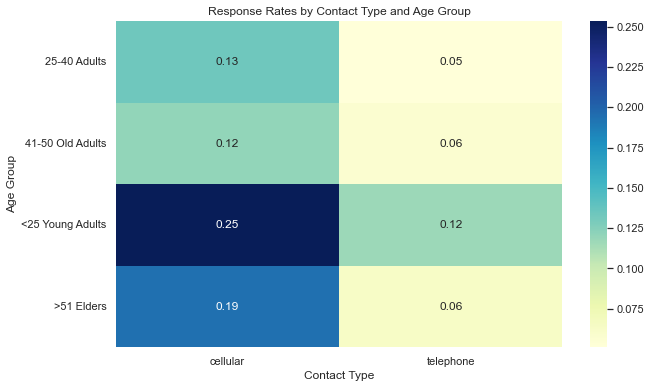

In [277]:
# first Group by age and contact, then calculate the response rate
response_rates = sample_df.groupby(['age_group', 'contact'])['term_deposit'].value_counts(normalize=True).unstack().loc[:, 'yes']

# Reshaping the data for easier plotting
response_rates = response_rates.reset_index()
response_rates_pivot = response_rates.pivot("age_group", "contact", "yes")

plt.figure(figsize=(10, 6))
sns.heatmap(response_rates_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Response Rates by Contact Type and Age Group')
plt.ylabel('Age Group')
plt.xlabel('Contact Type')
plt.show()


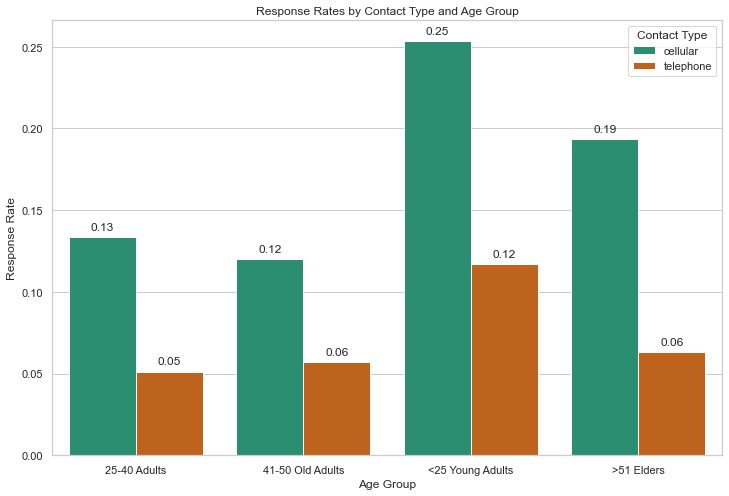

In [21]:
# first Group by age and contact, then calculate the response rate
response_rates = sample_df.groupby(['age_group', 'contact'])['term_deposit'].value_counts(normalize=True).unstack().loc[:, 'yes']
response_rates = response_rates.reset_index()

# chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='age_group', y='yes', hue='contact', data=response_rates, palette='Dark2')

# values on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.2f}'.format(height), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Response Rates by Contact Type and Age Group')
plt.ylabel('Response Rate')
plt.xlabel('Age Group')
plt.legend(title='Contact Type')
plt.show()

* <25 Young Adults:

This age group has the highest response rate for cellular contact type at 25%
Their response rate for 'telephone' contact type is also comparatively higher than the others at 12%

* 25-40 Adults:

This group has a response rate of 13% for cellular.
The response rate drops significantly for telephone at 5% the lowest among all age groups.

* 41-50 Old Adults:

They have a response rate of 12% for cellular similar to the <25 age group.
For telephone, their response rate is 6% which is on the lower end.

* 51+ Elders:

Elders show a relatively high response rate of 19% for cellular.
Similar to the other age groups, the response rate for telephone is low at 6%

#### Interpretations:

* Across all age groups, the cellular contact type has a higher response rate compared to telephone. Customers are more receptive to mobile communication.

#### Age Group Impact:

* The age group <25 Young Adults shows the highest responsiveness overall, particularly the cellular contact. Genz and Millenials off course

* The 25-40 Adults group is least responsive to telephone contact. This medium might be less effective for adults in their prime working years.

* Finally, Response rates for telephone are consistently lower across all age groups, it indicates a broader trend of this medium been less effective.

### 4.  Patterns in Economic Indicators 

In [44]:
from sklearn.preprocessing import LabelEncoder


columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'term_deposit']
relevant = bd[columns].copy()  # Creating a copy to avoid SettingWithCopyWarning

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the column
relevant['term_deposit'] = encoder.fit_transform(relevant['term_deposit'])


In [45]:
# Get correlation matrix
correlation_matrix = relevant.corr()

print(correlation_matrix)

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   
term_deposit       -0.298334       -0.136211       0.054878  -0.307771   

                nr.employed  term_deposit  
emp.var.rate       0.906970     -0.298334  
cons.price.idx     0.522034     -0.136211  
cons.conf.idx      0.100513      0.054878  
euribor3m          0.945154     -0.307771  
nr.employed        1.000000     -0.354678  
term_deposit      -0.354678      1.000000  


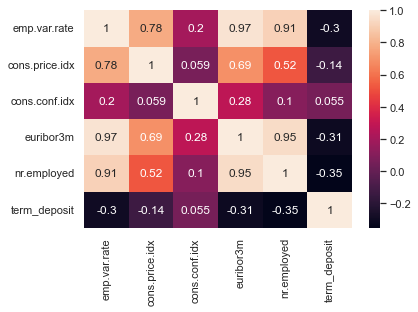

In [284]:

sns.heatmap(correlation_matrix, annot=True)

# Show the plot
plt.show()

### 5. Patterns in Month and Day of Week by Response Rates

### Month

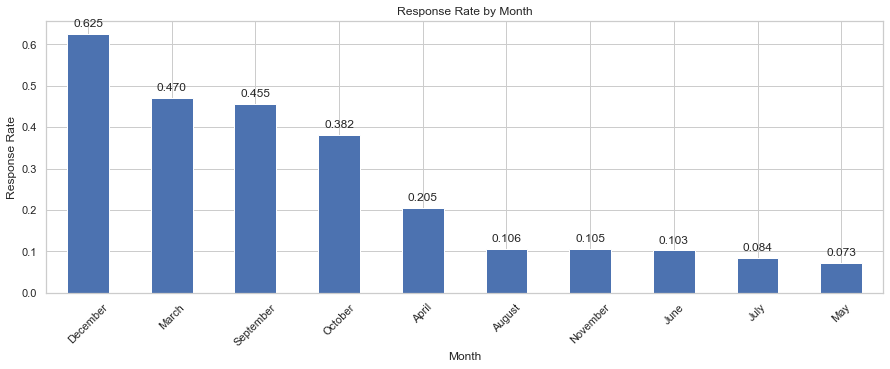

In [57]:
# Calculate response rates for each month
response_rate_by_month = sample_df.groupby('month')['term_deposit'].value_counts(normalize=True).unstack().loc[:, 'yes'].sort_values(ascending=False)

# Plotting the response rates by month
plt.figure(figsize=(15, 5))
ax = response_rate_by_month.plot(kind='bar')
plt.title('Response Rate by Month')
plt.ylabel('Response Rate')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding values on each bar
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()



#### Observations:

December shows the highest response rate, which could be due to a certain factors like ; year-end financial planning or holiday-related promotions by the bank.

March, September, and October also show  high response rates,  these months may have specific campaigns or financial incentives that align well with customer interests or we can say seasonal behaviors.

Then From April to November there is a noticeable decline in response rates, with the lowest rates beeen in July and May. This could reflect lower engagement due to  vacation periods, fewer financial incentives, or potentially less aggressive marketing efforts.

#### Interpretation:

The significant variance in response rates across different months suggests that timing plays a critical role in the effectiveness of the bank's marketing strategies. The higher rates in December and the first quarter of the year could indicate that customers are more open to financial products and services during these times, possibly related to financial planning for the year ahead. The lower response rates during the mid-year months may warrant a review of marketing strategies or product offerings to boost engagement during these slower periods.

### Day

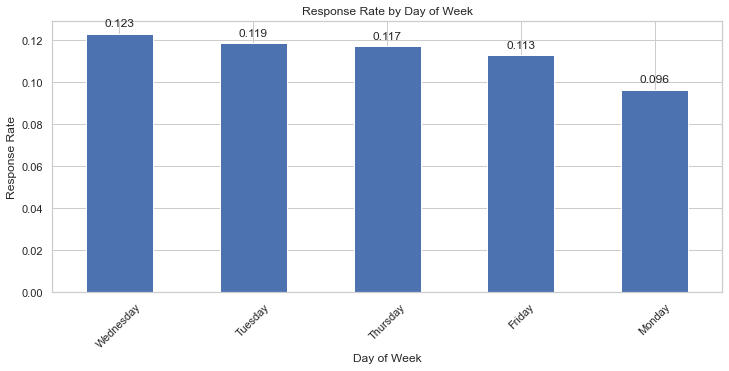

In [62]:

# Calculate response rates for each day of the week
response_rate_by_day = sample_df.groupby('day_of_week')['term_deposit'].value_counts(normalize=True).unstack().loc[:, 'yes'].sort_values(ascending=False)


# Plot
plt.figure(figsize=(12, 5))
ax = response_rate_by_day.plot(kind='bar')
plt.title('Response Rate by Day of Week')
plt.ylabel('Response Rate')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)

# Adding values 
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

#### Observations:

Wednesday appears to have the highest response rate, albeit not by a large margin. This could indicate midweek may be a slightly more effective time for customer engagement.

The response rates for Tuesday, Thursday, and Friday are slightly lower than Wednesday, but they are fairly consistent with one another.

Monday shows the lowest response rate of the week. Not surprising, it migt be so due to beginning-of-the-week rush where customers might be less inclined to engage in marketing conversations.

#### Interpretation:

The differences in response rates throughout the week are modest ; the day of the week might not be a strong predictor of customer responsiveness to term deposit offers.

That said, the slightly higher rates on Wednesday could imply that customers are more receptive to marketing communications midweek possibly because they are less busy with the wrap-up and planning for the upcoming one.


## Key Findings so far:

* Demographic Influence: The analysis identified notable differences in response rates across different job categories and education levels. underlining the need for demographic-specific marketing strategies.

* Economic Indicators: Significant associations were found between economic factors (employment variation rate, consumer price index, and Euribor 3-month rate) and the likelihood of customers subscribing to term deposits. The results suggested that economic context is a critical factor in marketing success.

* Timing and Contact Method: The timing of contacts (analyzed both monthly and weekly) significantly impacted response rates, highlighting the importance of strategically timing marketing efforts. Additionally, the method of contact also showed varying degrees of effectiveness ensueing the need to tailor communication channels to customer preferences.

* Contact Communication Type: The analysis also revealed that the type of communication used in contacting customers (Tlephone or cellular) had a notable impact on the response rates. This finding suggests that adapting the communication strategy to align with customer preferences can enhance the effectiveness of marketing campaigns.

* Customer Engagement: Variations in response rates across different days of the week suggest that while timing is important, the method and quality of engagement might play a more crucial role.



# Task 2 : Deposit Likelihood Prediction: - SuperVised Machine Learning: - Logistic Regression

In [296]:
#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#classifier library

from sklearn.linear_model import LogisticRegression

#evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
import statsmodels.api as sm





In [297]:
ml = sample_df.copy()
ml.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,age_group
32884,57,technician,married,High School,no,no,yes,cellular,May,Monday,...,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no,>51 Elders
3169,55,Other Jobs,married,Not specified,unknown,yes,no,telephone,May,Thursday,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,>51 Elders
32206,33,blue-collar,married,Basic 9 Years,no,no,no,cellular,May,Friday,...,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no,25-40 Adults
9403,36,Admin,married,High School,no,no,no,telephone,June,Friday,...,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no,25-40 Adults
14020,27,housemaid,married,High School,no,yes,no,cellular,July,Friday,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,25-40 Adults


 * creating a new dataframe for my model

In [298]:
ml.drop(['age_group'], axis=1, inplace=True)

In [299]:
ml.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'term_deposit'],
      dtype='object')

In [300]:
lr = ml[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]

lrlabel= ml[['term_deposit']]

### Encode Target label 

In [301]:


lrlabel['term_deposit'] = encoder.fit_transform(lrlabel['term_deposit'])
lrlabel.describe

<bound method NDFrame.describe of        term_deposit
32884             0
3169              0
32206             0
9403              0
14020             0
...             ...
12322             1
23440             0
29431             0
16627             1
1871              0

[8238 rows x 1 columns]>

### Encoding other category

In [302]:
encoder = LabelEncoder()

for cols in lr.columns:
    if lr[cols].dtype =='object':
        lr[cols] = encoder.fit_transform(lr[cols])
    else:
        lr[cols] = lr[cols]
        
lr.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32884,57,10,2,3,0,1,2,0,6,1,371,1,999,1,0,-1.8,92.893,-46.2,1.299,5099.1
3169,55,1,2,5,1,2,1,1,6,2,285,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0
32206,33,2,2,2,0,1,1,0,6,0,52,1,999,1,0,-1.8,92.893,-46.2,1.313,5099.1
9403,36,0,2,3,0,1,1,1,4,0,355,4,999,0,1,1.4,94.465,-41.8,4.967,5228.1
14020,27,4,2,3,0,2,1,0,3,0,189,2,999,0,1,1.4,93.918,-42.7,4.963,5228.1


### Normalization

In [303]:
scaler = MinMaxScaler()

for cols in lr.columns:
    if lr[cols].dtype == 'int64' or lr[cols].dtype == 'float64':
        lr[cols] = scaler.fit_transform(lr[[cols]])
    else:
        lr[cols] = lr[cols]
        

## Initial Logistic Regression

In [304]:
X_train, X_test, y_train, y_test = train_test_split(lr, lrlabel, test_size=0.2, random_state=42)


In [305]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())


LogisticRegression()

In [306]:
# Predictions
predictions = model.predict(X_test)

# Print classification report
print(classification_report(y_test, predictions))

# Coefficients
print("Coefficients:", model.coef_)

# For p-values using statsmodels
logit_model=sm.Logit(y_train, sm.add_constant(X_train))
result=logit_model.fit()
print(result.summary())


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1441
           1       0.65      0.37      0.47       207

    accuracy                           0.90      1648
   macro avg       0.78      0.67      0.71      1648
weighted avg       0.88      0.90      0.88      1648

Coefficients: [[ 8.85660721e-01 -7.78749489e-03  1.44844289e-01  4.06441420e-02
  -4.29474691e-01  7.10250974e-02 -1.30470630e-01 -4.61804745e-01
  -7.98578201e-02  6.71864810e-02  1.23863753e+01  1.49827759e-01
  -9.51817268e-01 -4.19259736e-01  5.31085360e-01 -1.69746590e+00
   1.19188855e+00  6.04789802e-01 -6.52196793e-03 -2.24582317e+00]]
Optimization terminated successfully.
         Current function value: 0.204825
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           term_deposit   No. Observations:                 6590
Model:                          Logit   Df Residuals:              


Model: Logistic Regression
Accuracy: 89.62%
Precision: 65.25%
Recall: 37.20%
F1 score: 47.38%
ROC score: 67.18%
Confusion matrix:
 [[1400   41]
 [ 130   77]]



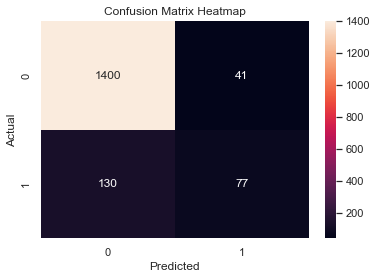

In [308]:

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_score = roc_auc_score(y_test, predictions)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

metrics = f"""
Model: Logistic Regression
Accuracy: {accuracy * 100:.2f}%
Precision: {precision * 100:.2f}%
Recall: {recall * 100:.2f}%
F1 score: {f1 * 100:.2f}%
ROC score: {roc_score * 100:.2f}%
Confusion matrix:
 {conf_matrix}
"""

print(metrics)

#print heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Heatmap")
plt.show()



From the binary regression logistic model,i identified the significant variables that have an effect on y based on their p values with the threshold been 0.05 and their coeficcient of likelihood. I will then proceed to the carry out another logistic regression model based on the significant variables from the model.

## Significant Feature Logistic Regression Model

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1441
           1       0.64      0.36      0.46       207

    accuracy                           0.89      1648
   macro avg       0.78      0.67      0.70      1648
weighted avg       0.88      0.89      0.88      1648

Coefficients: [[12.49489248 -0.824541    0.61864854 -1.22949858  0.99378492 -3.66997409
   0.67108045  0.04510538 -0.41944737 -0.33804465 -0.0883513 ]]
Optimization terminated successfully.
         Current function value: 0.205732
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           term_deposit   No. Observations:                 6590
Model:                          Logit   Df Residuals:                     6578
Method:                           MLE   Df Model:                           11
Date:                Sun, 24 Dec 2023   Pseudo R-squ.:                  0.4080
Time:                   

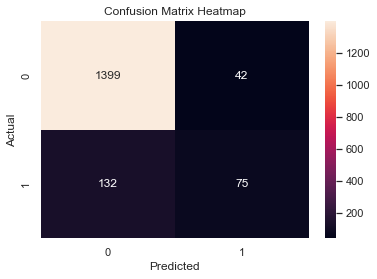

In [309]:
# List of chosen significant features
significant_features = ['duration', 'pdays', 'poutcome', 'emp.var.rate', 'euribor3m', 
                        'nr.employed', 'age', 'education', 'default', 'contact', 'month']

# Prepare the dataset with significant features
X_significant = lr[significant_features]
y = lrlabel['term_deposit']

# Split 
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(X_significant, y, test_size=0.2, random_state=42)

# Train a new logistic regression model
model_sig = LogisticRegression()
model_sig.fit(X_train_sig, y_train_sig)

# Making predictions on the test set
predictions_sig = model_sig.predict(X_test_sig)

# Print the classification 
print(classification_report(y_test_sig, predictions_sig))

# Print the coefficients
print("Coefficients:", model_sig.coef_)

# p-values on the significant features
logit_model_sig = sm.Logit(y_train_sig, sm.add_constant(X_train_sig))
result_sig = logit_model_sig.fit()
print(result_sig.summary())



# predictions using the model trained on significant features
predictions_sig = model_sig.predict(X_test_sig)

# Calculate metrics for the new model
accuracy_sig = accuracy_score(y_test_sig, predictions_sig)
precision_sig = precision_score(y_test_sig, predictions_sig)
recall_sig = recall_score(y_test_sig, predictions_sig)
f1_sig = f1_score(y_test_sig, predictions_sig)
roc_score_sig = roc_auc_score(y_test_sig, predictions_sig)

# Confusion Matrix for the new model
conf_matrix_sig = confusion_matrix(y_test_sig, predictions_sig)

metrics_sig = f"""
Model: Logistic Regression with Significant Features
Accuracy: {accuracy_sig * 100:.2f}%
Precision: {precision_sig * 100:.2f}%
Recall: {recall_sig * 100:.2f}%
F1 score: {f1_sig * 100:.2f}%
ROC score: {roc_score_sig * 100:.2f}%
Confusion matrix:
 {conf_matrix_sig}
"""

print(metrics_sig)

# confusion matrix heatmap
sns.heatmap(conf_matrix_sig, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Heatmap")
plt.show()

After constructing a new model with the signifcant variables, it is important to cross vaidate in other to improe the efficiency of the model. this is important to improve reliability and prevent over-fiting. The next step is building th cross validated model

# Cross Validation

I will Implement cross-validation to ensure my model's performance is consistent across different data splits. to prevent overfitting and generalize on new unseen data

Cross-validation scores: [0.90819423 0.91047041 0.90288316 0.90743551 0.92109256]
Mean CV Accuracy: 0.9100151745068285
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1441
           1       0.64      0.36      0.46       207

    accuracy                           0.89      1648
   macro avg       0.78      0.67      0.70      1648
weighted avg       0.88      0.89      0.88      1648

Coefficients: [[12.49489248 -0.824541    0.61864854 -1.22949858  0.99378492 -3.66997409
   0.67108045  0.04510538 -0.41944737 -0.33804465 -0.0883513 ]]
Optimization terminated successfully.
         Current function value: 0.205732
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           term_deposit   No. Observations:                 6590
Model:                          Logit   Df Residuals:                     6578
Method:                           MLE   Df Model:              

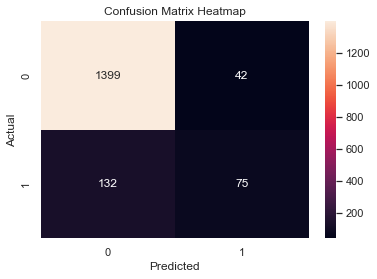

In [315]:

from sklearn.model_selection import cross_val_score, train_test_split


# List of chosen significant features
significant_features = ['duration', 'pdays', 'poutcome', 'emp.var.rate', 'euribor3m', 
                        'nr.employed', 'age', 'education', 'default', 'contact', 'month']

# Prepare the dataset with significant features
X = lr[significant_features]
y = lrlabel['term_deposit']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))

# Print the coefficients
print("Coefficients:", model.coef_)

# p-values using statsmodels
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
print(result.summary())

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_score = roc_auc_score(y_test, predictions)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 score: {f1 * 100:.2f}%")
print(f"ROC score: {roc_score * 100:.2f}%")
print("Confusion matrix:\n", conf_matrix)

# Plotting the confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Heatmap")
plt.show()


# Answering The Questions on the Task

### 1.  Do the job backgrounds and education levels affect customers’ responding rate significantly?

* Education: The coefficient for education is 0.0506 with a p-value of 0.019. This suggests that education levels do have a statistically significant effect on the likelihood of a customer responding positively to a term deposit offer. The positive coefficient indicates that higher education levels are associated with a higher likelihood of subscription.



* Job: In the initial model, the coefficient for is -0.0073 with a p-value of 0.581. This indicates that while job backgrounds were initially considered in the first model, they dont have a statistically significant effect on the likelihood of a customer responding positively to a term deposit offer. The high p-value suggests that the impact of job backgrounds is not a strong enough to be considered significant effect.

### 2. Is there a relationship between customers response rates and the contact communication type?

The coefficient for the contact variable is -0.4442 with a p-value of 0.002. This indicates a statistically significant relationship between the contact communication type and the customer response rate. The negative coefficient suggests that certain types of contact (telephone / cellular) are associated with a lower likelihood of a customer subscribing to a term deposit.

* Summary :Education levels are a significant predictor of customer response rates to term deposit offers. Job backgrounds was not significant.There is a significant relationship between contact communication type and customer response rates.

### 3. Is the contact communication type -responses relationship identified in the previous question the same for all age groups?

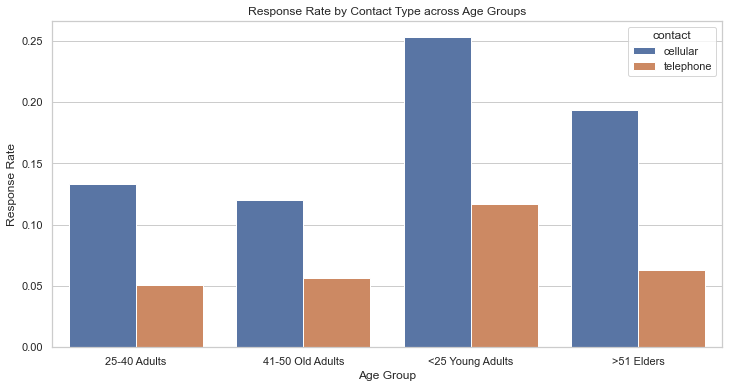

Age Group: >51 Elders, Chi-square test P-value: 9.651556239834825e-11
Age Group: 25-40 Adults, Chi-square test P-value: 1.840350899186192e-17
Age Group: 41-50 Old Adults, Chi-square test P-value: 1.6912408433731314e-06
Age Group: <25 Young Adults, Chi-square test P-value: 0.006178376333066204


In [312]:
# Function to categorize age

def age_grouping(age):
    if age <=25:
        return "<25 Young Adults"
    elif age <=40:
        return "25-40 Adults"
    elif age<=50:
        return "41-50 Old Adults"
    else:
        return ">51 Elders"
    
ml['age_group'] = ml['age'].apply(age_grouping)

# to 11 and 0
ml['term_deposit'] = encoder.fit_transform(ml['term_deposit'])






# Grouping by age group and contact type and calculating the mean response
grouped_data = ml.groupby(['age_group', 'contact'])['term_deposit'].mean().reset_index()

# Visualizing the response rate by contact type for each age group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='term_deposit', hue='contact', data=grouped_data)
plt.title('Response Rate by Contact Type across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Response Rate')
plt.show()



# Chi Statistical Test for each age group
for age_group in ml['age_group'].unique():
    subgroup = ml[ml['age_group'] == age_group]
    # Using count (frequency) for chi-squared test
    contingency_table = pd.crosstab(subgroup['contact'], subgroup['term_deposit'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Age Group: {age_group}, Chi-square test P-value: {p}")


The chi-square test results indicate that there is a statistically significant relationship between contact type and term deposit response for each of the age groups:

* Age Group >51 Elders: The very low p-value (9.65e-11) suggests that there is a statistically significant association between contact type and term deposit responses in this age group.


* Age Group 25-40 Adults: Similarly, a very low p-value (1.84e-17) indicates a strong statistical significance of the relationship between contact type and term deposit responses for adults aged 25 to 40.


* Age Group 41-50 Old Adults: The low p-value (1.69e-06) also indicates a significant association between contact type and response rates in this age group.


* Age Group <25 Young Adults: The p-value (0.0062) is less than 0.05, suggesting  there is a statistically significant relationship in this age group as well, although the level of significance is lower compared to the other groups.

 Overall the results suggest that the type of contact (telephone / cellular) does indeed have a significant impact on the likelihood of a customer responding to a term deposit offer and this impact varies across different age groups.


 ## 4a. Significant Impact of Call Duration on Customer Response:


* Coefficient: 17.0687
* P-value: <0.000
* Interpretation: Highly significant. Longer call durations increase the likelihood of a term deposit subscription.

The analysis strongly indicates that the duration of the call plays a pivotal role in predicting customer responses to term deposit offers. Specifically the longer the duration of the call, the higher the likelihood of a positive response. This finding suggests that customers who engage longer in conversations with bank representatives might be more receptive to understanding the details of the term deposit offer and might lead to a higher chance of agreement.

This insight emphasizes the importance of quality engagement in customer interactions. It suggests that instead of focusing solely on the number of calls or contacts made, banks should also consider the depth and effectiveness of each interaction. Training customer service representatives to engage in more meaningful and informative conversations could increase the success rate of these marketing calls.

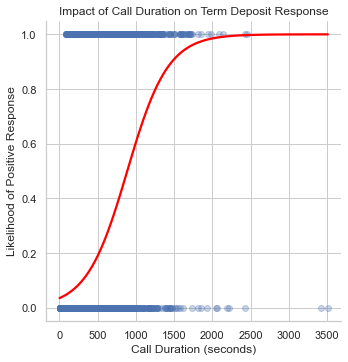

In [313]:
sns.lmplot(x='duration', y='term_deposit', data=ml, logistic=True, ci=None, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Impact of Call Duration on Term Deposit Response')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Likelihood of Positive Response')
plt.show()

The graph also further validate the impact of call duration on the likelihood of a customer agreeing to a term deposit.This insight can guide the efforts in suggesting that calls should be long enough to adequately inform and persuade the customer.

## 4b. Significant Impact of poutcome (Previous Campaign Outcome)

* Coefficient: 0.6727
* P-value: <0.000
* Interpretation: Highly significant positive impact. Successful outcomes in previous campaigns increase the likelihood of subscription.


Statistically "poutcome" in the logistic regression output is significant at p < 0.05, with a coefficient estimate of 0.6727. This positive coefficient indicates that a successful outcome in the previous campaign is a strong predictor of a positive response in the current campaign.

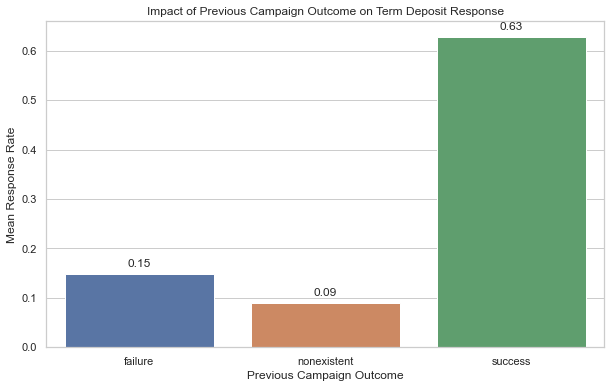

In [314]:
response_rate_by_poutcome = ml.groupby('poutcome')['term_deposit'].mean().reset_index()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='poutcome', y='term_deposit', data=response_rate_by_poutcome)
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Mean Response Rate')
plt.title('Impact of Previous Campaign Outcome on Term Deposit Response')

#  bar with the value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')


plt.show()

This barplot shows three categories of previous campaign outcomes: failure, nonexistent, and success.

The bar for failure indicates a mean response rate of  0.15, suggesting that customers whose last campaign outcome was a failure have around a 15% likelihood of responding.

The nonexistent outcome has an even lower mean response rate at 0.09, implying that customers with no prior campaign interaction are less likely to respond.

In stark contrast the success bar has a a mean response rate of about 0.63, indicating that customers who had a successful outcome in the previous campaign are much more likely, at 63%, to respond positively again. This substantial difference underscores the importance of successful customer engagement in previous campaigns for future campaign effectiveness.